## package - 'corrgram'
- install.packages('corrgram')

In [1]:
library(corrgram)
dim(cars)
summary(cars)
head(cars)

[1] 50  2

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


## Correlações
- cor() -> Retorna correlação entre as variaveis
- corrgram() -> Cria uma gráfico de correlação


,speed,dist
speed,1.0000000,0.8068949
dist,0.8068949,1.0000000


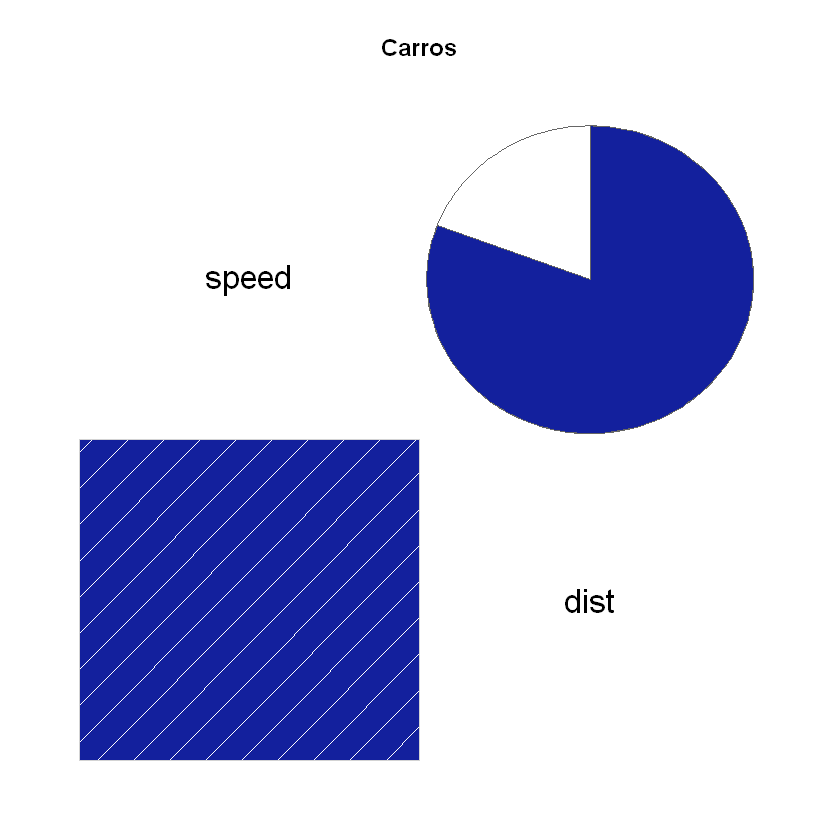

In [3]:
# corelação entre uma variavel e ela mesma sempre é 1
# correlação = 0.80 -> Positiva forte
cor(cars)

corrgram(cars, order=T, lower.panel=panel.shade, upper.panel=panel.pie,
text.panel=panel.txt, main='Carros')

## lm() -> Linear Model | Modelo Linear
- formula -> variavel dependente (speed) ~ variavel independente (dist)
- lm() -> retorna interceptação e inclinção

In [4]:
modelo = lm(speed ~ dist, data=cars)
modelo


Call:
lm(formula = speed ~ dist, data = cars)

Coefficients:
(Intercept)         dist  
     8.2839       0.1656  


## Grafico de dispersão com linha de melhor ajuste
- abline() -> Retorna linha de melhor ajuste

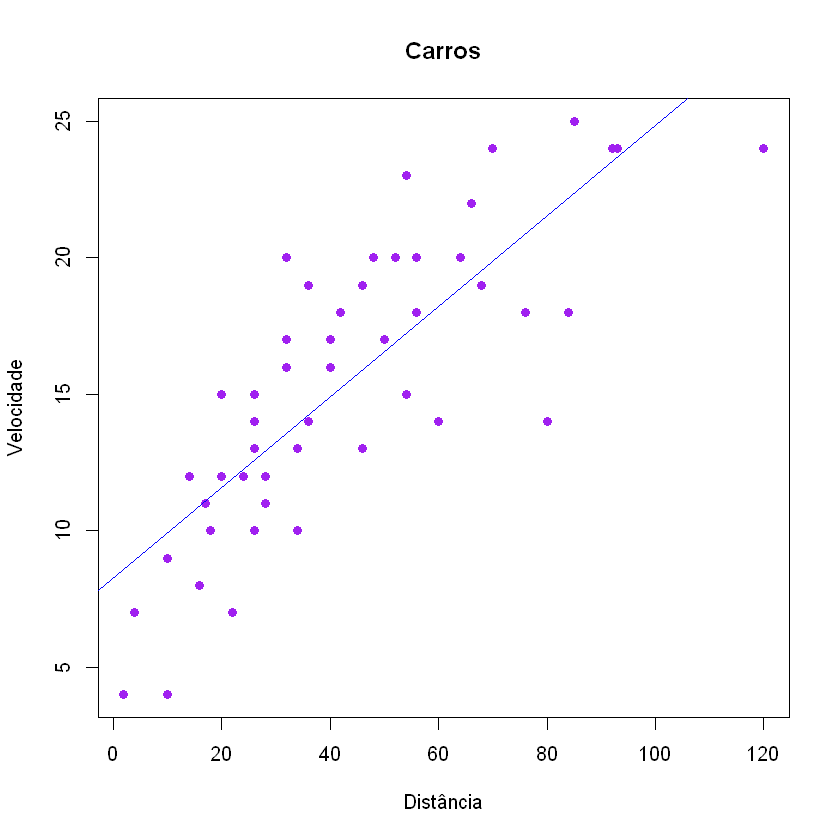

In [9]:
plot(speed ~ dist, data=cars, xlab='Distância', ylab='Velocidade',
main='Carros', pch=19, col='purple')
abline(modelo, col='blue')

## Previsões
- coefficients
- interceptação + inclinação * valor explanatório
- predict() -> Retorna uma previsão genérica (faz o callculo acima)
- predict() recebe o modelo e o valor base para previsão

In [12]:
# Qual a velocidade do veiuculo que levou 22 metros para parar?
modelo$coefficients
modelo$coefficients[1] + modelo$coefficients[2] * 22

predict(modelo, data.frame(dist=22))

(Intercept)        dist 
  8.2839056   0.1655676

(Intercept) 
   11.92639

1 
11.92639

## Resumo dos dados
- Residuos - Valores sem tendencia
- fitted values - São os valores ajustados a linha de ajuste


Call:
lm(formula = speed ~ dist, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5293 -2.1550  0.3615  2.4377  6.4179 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.28391    0.87438   9.474 1.44e-12 ***
dist         0.16557    0.01749   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.156 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


(Intercept)        dist 
  8.2839056   0.1655676

1           2           3           4           5           6 
-4.61504079 -5.93958139 -1.94617594 -4.92639228 -2.93298684 -0.93958139 
          7           8           9          10          11          12 
-1.26412199 -2.58866258 -3.91320318 -0.09855441 -1.91979773  1.39814831 
         13          14          15          16          17          18 
 0.40474287 -0.25752743 -0.91979773  0.41133742 -0.91320318 -0.91320318 
         19          20          21          22          23          24 
-2.90001408  1.41133742 -0.24433833 -4.21796012 -7.52931161  3.40474287 
         25          26          27          28          29          30 
 2.41133742 -2.22455467  2.41793197  1.09339137  3.41793197  2.09339137 
         31          32          33          34          35          36 
 0.43771563  2.76225622  0.44431018 -2.86704131 -4.19158191  4.75566167 
         37          38          39          40          41          42 
 3.09998592 -0.54250072  6.41793197  3.76885078  3.10658048  2.44431018 
         43          44          45          46          47          48 
 1.11976958  2.78863443  5.77544533  4.12636413  0.48387749  0.31830992 
         49          50 
-4.15201460  2.64285051

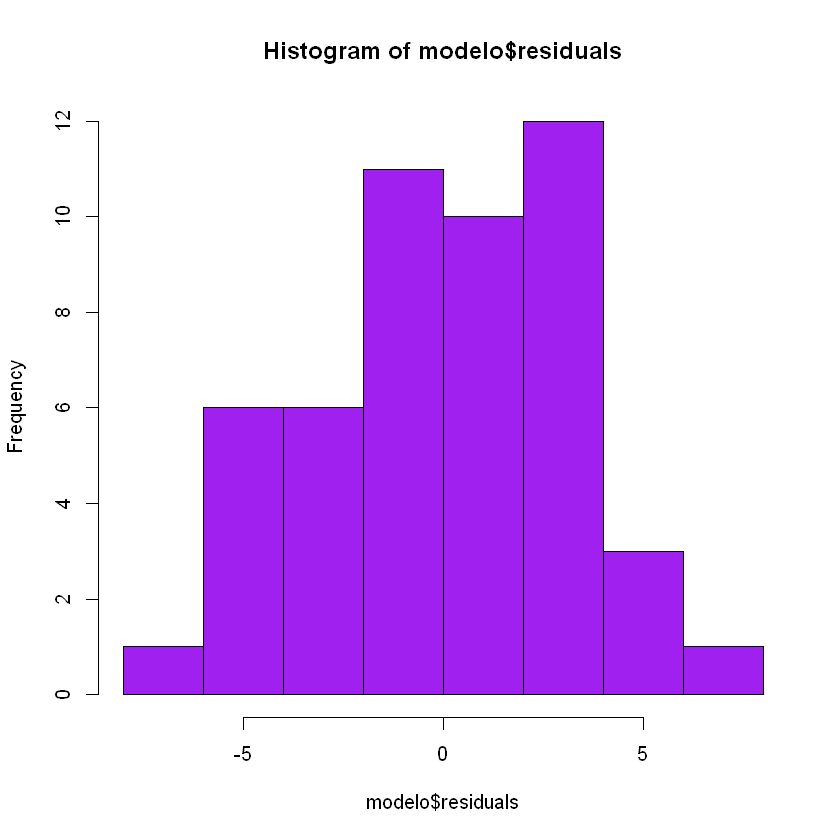

1         2         3         4         5         6         7         8 
 8.615041  9.939581  8.946176 11.926392 10.932987  9.939581 11.264122 12.588663 
        9        10        11        12        13        14        15        16 
13.913203 11.098554 12.919798 10.601852 11.595257 12.257527 12.919798 12.588663 
       17        18        19        20        21        22        23        24 
13.913203 13.913203 15.900014 12.588663 14.244338 18.217960 21.529312 11.595257 
       25        26        27        28        29        30        31        32 
12.588663 17.224555 13.582068 14.906609 13.582068 14.906609 16.562284 15.237744 
       33        34        35        36        37        38        39        40 
17.555690 20.867041 22.191582 14.244338 15.900014 19.542501 13.582068 16.231149 
       41        42        43        44        45        46        47        48 
16.893420 17.555690 18.880230 19.211366 17.224555 19.873636 23.516123 23.681690 
       49        50 
28.152015 22.357149

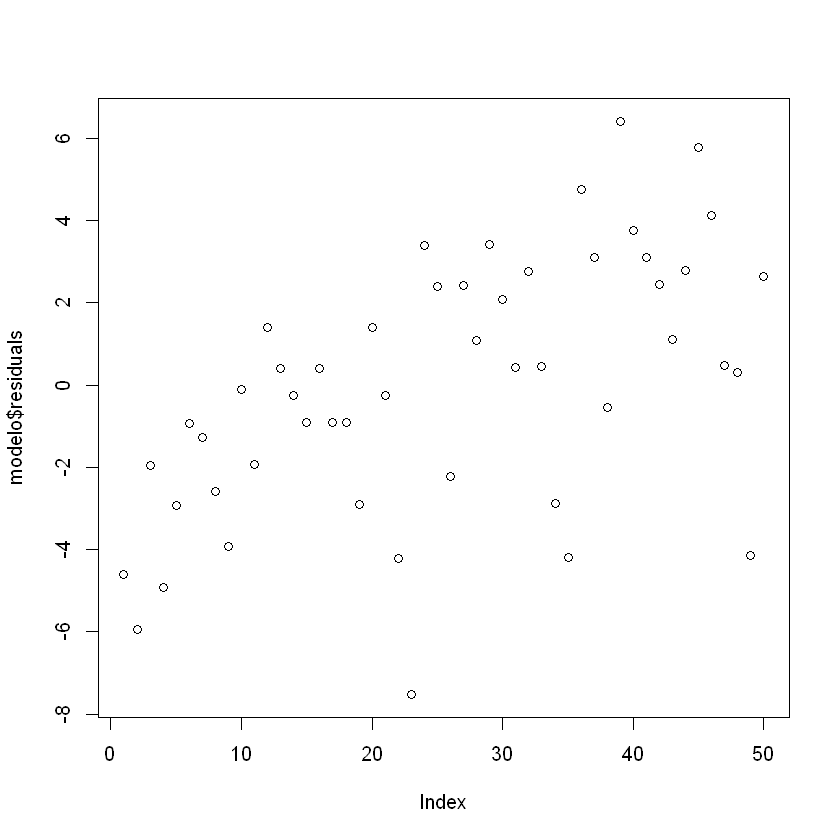

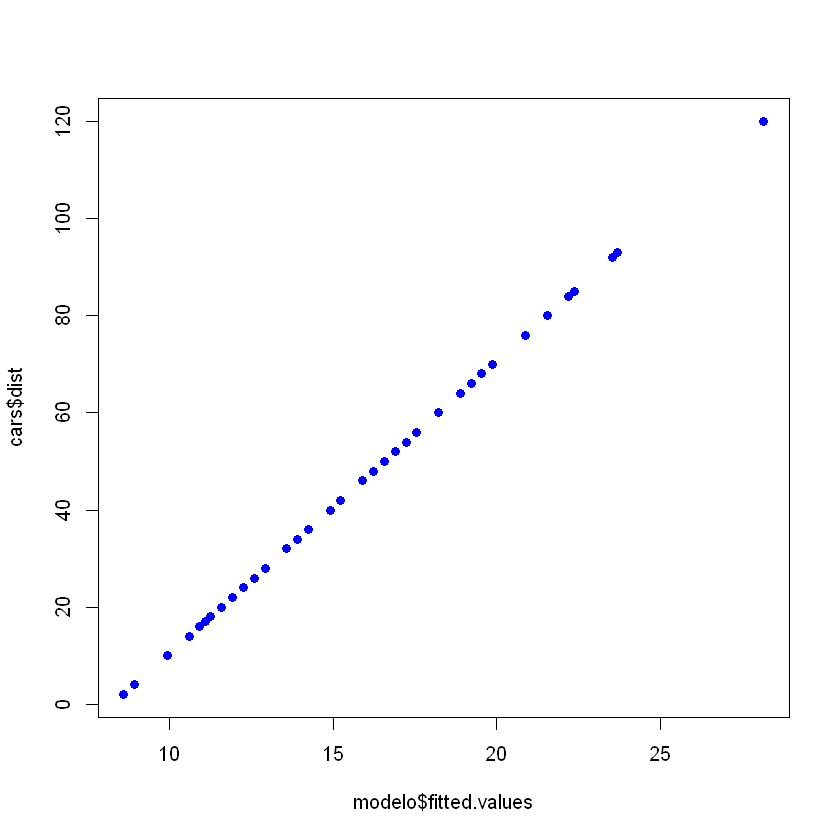

In [15]:
summary(modelo)
modelo$coefficients
modelo$residuals
hist(modelo$residuals, col='purple')
plot(modelo$residuals)
modelo$fitted.values
plot(modelo$fitted.values, cars$dist, col='blue', pch=19)